# Додаткові завдання №5

## 1 Задача 1.10.10
Випадкова величина $\xi$ має щiльнiсть $p(x) = e^{-2 |x|}$.
Обчислити
1. $\mathsf{P}(\xi < 1)$;
2. $\mathsf{P}(\xi < 3|\xi \geq 2)$;
3. $\mathsf{E}\xi, \mathsf{D}\xi$.

### 1.1 Завдання 1
Реалізуйте випадкову величину $\xi$ за допомогою класу [scipy.stats.rv_continuous](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html).

In [6]:
# Місце для Вашого коду
from scipy.stats import rv_continuous

import numpy as np


class new_rv(rv_continuous):
    
    def _pdf(self, x):
        return np.exp(-2 * np.abs(x))


rv = new_rv()


### 1.2 Завдання 2
Зобразіть графічно функцію щільності та функцію розподілу отриманої випадкової величини.

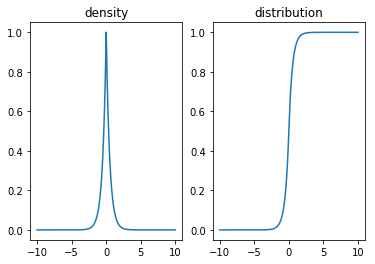

In [10]:
# Місце для Вашого коду

import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(-10, 10, 0.01)

y1 = rv.pdf(x)
y2 = rv.cdf(x)

plt.subplot(1, 2, 1, title='density')
plt.plot(x, y1)
plt.subplot(1, 2, 2, title='distribution')
plt.plot(x, y2)

plt.show()

### 1.3 Завдання 3
Розв'яжіть задачу за допомогою отриманої випадкової величини та порівняйте результати з теоретично розрахованими.

In [17]:
# Місце для Вашого коду

print(f"task 1: {rv.cdf(1)}")

# формула умовної імовірності
tmp = (rv.cdf(3) - rv.cdf(2)) / (1 - rv.cdf(2))
print(f'task 2: {tmp}')

print("task 3:")
print(f'    Ee = {rv.expect(lambda x: x)}')
print(f'    De = {rv.expect(lambda x: x**2) - rv.expect(lambda x: x) ** 2}')


task 1: 0.9323323583816931
task 2: 0.8646647167632358
task 3:
    Ee = 0.0
    De = 0.49999999999999994


## 2 Апроксимація числа $\pi$ (задача Бюффона)

Розглянемо дві паралельні прямі на площині, відстань між якими дорівнює $1$. Не втрачаючи загальності, нехай ці прямі задаються рівностями $y = 0$ та $y = 1$. Кинемо на цю площину голку довжиною $1$ так, що координата по осі $y$ її середини рівномірно розподілена на $[0,1]$, а кут між голкою та віссю $x$ (додатною піввіссю $x$) рівномірно розподілений на $[0, \pi]$. Тоді ймовірність того, що голка перетне будь-яку з паралельних прямих, дорівнює $2/\pi$.

Реалізуйте функцію емпіричної апроксимації числа $\pi$ за $n$ симуляцій (кидання $n$ голок). Зобразіть графічно отримані елементи: паралельні прямі та всі голки. Виділіть точки, що належать колу, окремим кольором від інших точок.

Виведіть результат функції для:
1. $n = 10$
2. $n = 100$
3. $n = 500$
4. $n = 1000$

for n = 10 pi = 3.3333333333333335


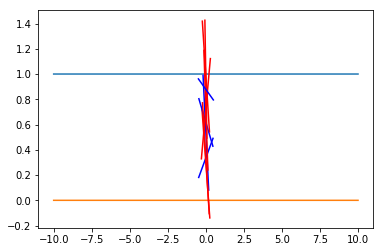

for n = 100 pi = 3.0303030303030303


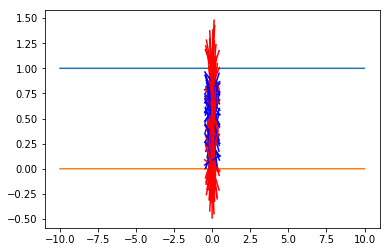

for n = 500 pi = 3.021148036253776


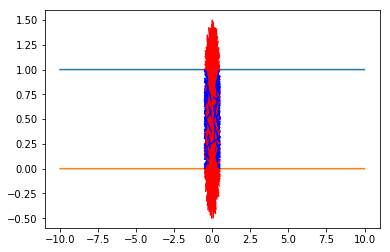

for n = 1000 pi = 3.144654088050314


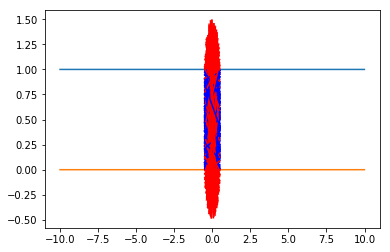

In [30]:
# Місце для Вашого коду

epsilon = 1e-8

sp = np.arange(-10, 10, 0.01)
 
SIZE = 1   # довжина голки  (не варить уже голова писати англійською)))

for n in [10, 100, 500, 1000]:
    plt.plot(sp, sp/sp)
    plt.plot(sp, sp * 0)
    
    centers = np.random.uniform(size=n)
    
    # кут генеруємо з [-pi/2, pi/2] для задання голки за допомогою рівняння з кутовим коефіцієнтом
    angles = np.pi * np.random.uniform(size=n) - np.pi / 2
    amount = 0
    
    for k, b in zip(angles, centers):
        
        # довжина проекції голки на вісь Ох
        tmp_size = SIZE * np.cos(k)
        tmp_sp = np.arange(-tmp_size/2, tmp_size/2, 0.01)
        
        def tmp_func(x):
            """Pівняння з кутовим коефіцієнтом, що задає голку"""
            return np.tan(k) * x + b
        
        # якщо кінець голки виліз за межі [0, 1], то вона перетнула одну з прямих
        if not 0 < tmp_func(tmp_size/2) < 1 or not 0 < tmp_func(-tmp_size/2) < 1: 
            color = 'r'
            amount += 1
        else:
            color = 'b'
        
        plt.plot(tmp_sp, tmp(tmp_sp), color)
    print(f'for n = {n} pi = {2 / (amount / n)}')
    plt.show()